# Coursework TensorFlow
# SPCE0038: Machine Learning with Big-Data

---

## Overview

This coursework is provided as a Jupyter notebook, which you will need to complete.  

Throughout the notebook you will need to complete code, analytic exercises (if equations are required please typeset your solutions using latex in the markdown cell provided) and descriptive answers. Much of the grading of the coursework will be performed automatically, so it is critical you name your variables as requested.

Before you turn this coursework in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says "YOUR ANSWER HERE" or `YOUR CODE HERE` and remove remove the `raise NotImplementedError()` exceptions that are thrown before you have added your answers. Do not add and remove cells but rather provide your answers in the spaces given.

Please also:
- Make sure your notebook executes without errors.
- Do not overwrite or rename any existing variables.
- Do not install code or packages in the notebooks.

Please rename the notebook filename to include your name in the filename.  And please also add your name below:

In [1]:
NAME = "22063614"

You will be able to run some basic tests in the notebook to check the basic operation of your code is as expected.  Although do not assume your responses are complete or fully correct just because the basic tests pass.

Once you have renamed the notebook file and completed the exercises, please upload the notebook to Moodle.


---

## Dependencies

- Standard course dependencies (e.g. numpy, scikit-learn, etc.)
- [TensorFlow](https://www.tensorflow.org/)
- [TensorFlow DataSets](https://www.tensorflow.org/datasets)

---

Notes for people running the notebook in Google Colab:

- This notebook uses quite a bit of RAM (the solutions run with ~8.5Gb of RAM), which means that if you are very inefficient in your memory usage, it will not fit within Colab's limits of 12Gb. If this is the case, you can try restarting the runtime to free up memory of variables you have created and that you no longer use or write your code in a more efficient way.
- You can enable a Runtime with GPU acceleration for faster training (Runtime -> Change runtime type)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_datasets as tfds

In [3]:
def check_var_defined(var):
    try:
        exec(var)
    except NameError:
        raise NameError(var + " not defined.")
    else:
        print(var + " defined.")

# Part 1: Data pre-processing


In these exercises we will look at the classification of flowers into 5 different classes using convolutional neural networks (CNNs). The implementation of this will be done using TensorFlow (TF).

The dataset can be loaded in using the [Tensorflow Datasets](https://www.tensorflow.org/datasets) package. Below you see how we load in the data and change it from a TF generator object into a list of the images and a list of the targets. 

In [4]:
# Load data
data = tfds.load('tf_flowers', split=["train"], as_supervised=True)

In [5]:
images, targets = zip(*[i for i in data[0]])
labels = ["dandelion", "daisy", "tulips",  "sunflowers", "roses"]

_Plot the first two images and their classes by writing a function `show_image`. Set the title of the images to be the class (use the actual label, not the number) it belongs to._ 

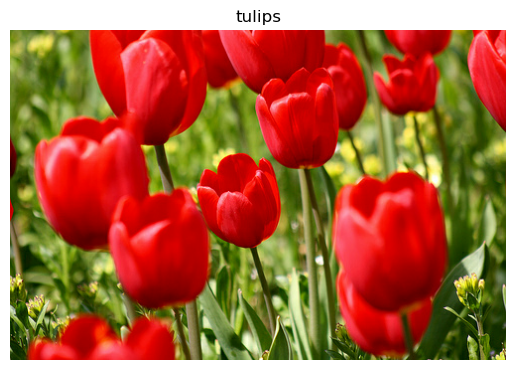

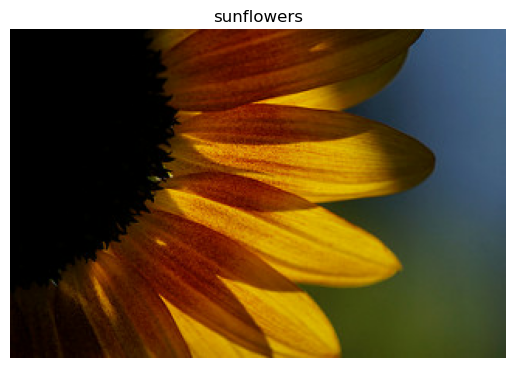

In [6]:
def show_image(image, target):
    # plot the image with labels
    plt.imshow(image)
    plt.title(labels[target])
    plt.axis('off')
    plt.show()

for i in range(2):
    show_image(images[i], targets[i])

Before we can use the data to train neural networks, we need to pre-process the data such that:
    
- the images are all the same shape (224,224)
- the images, originally with values (0, 255), are mapped to have values between (0, 1)
- the labels are represented as one-hot vectors

_Write a function to rescale and resize the images._

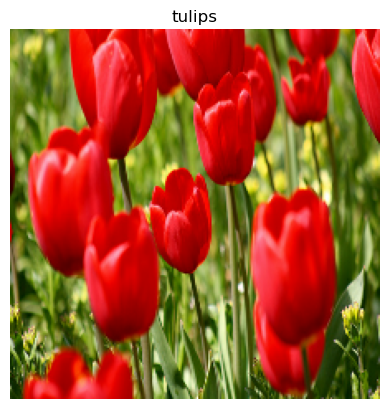

In [7]:
def rescale_and_resize(image):
    # rescale and resize all images
    image = tf.image.resize(image, (224,224))
    preprocessed_image = image / 255
    return preprocessed_image

show_image(rescale_and_resize(images[0]), targets[0])

In [8]:
check_var_defined('rescale_and_resize')

rescale_and_resize defined.


_Now use the function to pre-process the data in the variable `images` and save the preprocessed images in an np.ndarray `images_preprocessed`._

In [9]:
images_preprocessed = np.array([rescale_and_resize(i) for i in images])

In [10]:
check_var_defined('images_preprocessed')
assert type(images_preprocessed) == np.ndarray, "Make sure to store your answer as a np.ndarray"

images_preprocessed defined.


One approach to represent the image labels so that they can be trainable by a neural network is to represented them as a one-hot vector. 

_Write a function `one_hot_encoding` that takes the integer label and returns a one-hot vector of the label._

In [11]:
def one_hot_encoding(target):
    vec_hot = np.zeros(5)
    vec_hot[target] = 1
    return vec_hot

print(f"target: {targets[0]}, encoding: {one_hot_encoding(targets[0])}")

target: 2, encoding: [0. 0. 1. 0. 0.]


_Now use the function `one_hot_encoding` to create an np.ndarray of the one-hot representations of all the labels in `targets` and save them in `targets_preprocessed`._

In [12]:
targets_preprocessed = np.array([one_hot_encoding(j) for j in targets])

In [13]:
check_var_defined('targets_preprocessed')
assert type(targets_preprocessed) == np.ndarray, "Make sure to store your answer as a np.ndarray"

targets_preprocessed defined.


In this notebook you will train different models and compare them against each other. 

Now that the data is pre-processed. We will split the data in three datasets, a train, validation and test set. 

_Why do we need these three sets and what do we use them for._

We need these sets to evaluate the performance of different models and choose the best one. Where we use the training set to train the model and the validation set to adjust our model, then using the test set to evaluate the performance of the model.

_Now split the data such that we have a train set with 80\% of the samples and a validation and test set each with 10\% of the samples. Save the results in `x_train`, `y_train`, `x_val`, `y_val`, `x_test`, and `y_test`._

In [14]:
tf.keras.utils.set_random_seed(371947)
n_all = len(images_preprocessed)
index = np.random.randint(n_all, size=n_all)
n_tra, n_val = int(0.8*n_all), int(0.9*n_all)
x_train, y_train = images_preprocessed[index][:n_tra], targets_preprocessed[index][:n_tra]
x_val, y_val = images_preprocessed[index][n_tra:n_val], targets_preprocessed[index][n_tra:n_val]
x_test, y_test = images_preprocessed[index][n_val:], targets_preprocessed[index][n_val:]

print(f"Train samples: {len(x_train)}, Validation samples: {len(x_test)}, Test samples: {len(x_val)}")

Train samples: 2936, Validation samples: 367, Test samples: 367


In [15]:
check_var_defined('x_train')
check_var_defined('y_train')

check_var_defined('x_val')
check_var_defined('y_val')

check_var_defined('x_test')
check_var_defined('y_test')

x_train defined.
y_train defined.
x_val defined.
y_val defined.
x_test defined.
y_test defined.


WARNING: Before we continue we delete the variable `images_preprocessed` (you don't need that anymore) to manage our RAM consumption. If you want to use that variable again you will have to rerun the cell that creates it.

In [16]:
# Freeing up RAM by deleting this variable
del images_preprocessed

# Part 2: Training a basic CNN model 

Now that we have pre-processed the data and split it into different parts for training, validation and testing, you can start training some neural networks. 

Our model will take as input the $224 \times 224$ rgb (3-channel) images and will give as output a length five vector of which the different elements correspond to the five different classes. 

The model will start with convolutional layers followed by a hidden dense layer and then the final dense layer that gives us our output. 

_What kind of activation function should we use on the convolutional, dense and output layers and why these specific activation functions? (motivate your answers)_

We should use ReLU activation function for convolutional and dense layers because it is computationally efficient and can solve the vanishing gradient problem. And for output layers, we should use softmax activation function for multi-class classification.

_Create a model using the `tf.keras.models.Sequential()` model and add to that:_

- Input layer: A 2D convolutional layer with 8 filters, a 3x3 kernel and the ReLU activation function. Specify that this layer has an `input_shape` of (224, 224, 3)_ 
- A 2D MaxPool layer with strides 2x2

- A 2D convolutional layer with 16 filters, a 3x3 kernel and a the ReLU activation function
- A 2D MaxPool layer with strides 2x2

- A 2D convolutional layer with 32 filters, a 3x3 kernel and a the ReLU activation function
- A 2D MaxPool layer with strides 2x2

- A 2D convolutional layer with 32 filters, a 3x3 kernel and a the ReLU activation function
- A 2D MaxPool layer with strides 2x2

- A Flatten layer to flatten the filters to a single vector
- A Dense layer with 32 nodes and your chosen activation

- Output layer: A Dense layer with 5 nodes and your chosen activation

_Store the model in the variable `model_basic`._

In [17]:
tf.keras.backend.clear_session()
tf.keras.utils.set_random_seed(93612)

model_basic = tf.keras.models.Sequential([
    # Input layer
    tf.keras.layers.Conv2D(filters=8, kernel_size=(3,3), activation="relu", input_shape=(224, 224, 3)),
    # Maxpool and convolutional layers
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    # Flatten and dense layer
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=32, activation='relu'),
    # Output layer
    tf.keras.layers.Dense(units=5, activation='softmax')
])

In [18]:
check_var_defined('model_basic')

model_basic defined.


To compile the model we need to specify a loss function. 

_What loss function would be appropriate for this multi-class classfication problem?_

_Also, during training we would like to monitor how well our model performs on predicting the targets. What would be a good metric to track? Motivate your answers._ 

Categorical_crossentropy would be appropriate here because our targets are one-hot vectors, and accuracy would be a good metric to track because it can evaluate the performance of the model.

Now compile the model using the `Adam` optimiser, your chosen loss, and your chosen metric to track. (Tip: TF has some loss function and metrics implemented in [tf.keras.losses](https://www.tensorflow.org/api_docs/python/tf/keras/losses) and [tf.keras.metrics](https://www.tensorflow.org/api_docs/python/tf/keras/metrics).)

In [19]:
model_basic.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [20]:
check_var_defined('model_basic')

model_basic defined.


_Now fit the train data for 10 epochs and save the training history in the variable `history_basic`. Also specify the `validation_data` and a `batch_size` of 32._

In [21]:
history_basic = model_basic.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_val, y_val))

Epoch 1/10
92/92 [==============================] - 17s 172ms/step - loss: 1.4072 - accuracy: 0.3852 - val_loss: 1.3031 - val_accuracy: 0.4414
Epoch 2/10
92/92 [==============================] - 15s 165ms/step - loss: 1.1306 - accuracy: 0.5208 - val_loss: 1.1606 - val_accuracy: 0.4768
Epoch 3/10
92/92 [==============================] - 15s 165ms/step - loss: 0.9658 - accuracy: 0.6001 - val_loss: 0.9892 - val_accuracy: 0.6158
Epoch 4/10
92/92 [==============================] - 15s 165ms/step - loss: 0.8653 - accuracy: 0.6502 - val_loss: 0.9855 - val_accuracy: 0.6185
Epoch 5/10
92/92 [==============================] - 15s 165ms/step - loss: 0.7608 - accuracy: 0.7064 - val_loss: 0.9144 - val_accuracy: 0.6185
Epoch 6/10
92/92 [==============================] - 15s 165ms/step - loss: 0.6348 - accuracy: 0.7575 - val_loss: 0.9055 - val_accuracy: 0.6785
Epoch 7/10
92/92 [==============================] - 15s 167ms/step - loss: 0.5421 - accuracy: 0.8065 - val_loss: 0.8280 - val_accuracy: 0.7030

In [22]:
check_var_defined('history_basic')

history_basic defined.


_Now to see how the model performs, write a function `plot_metrics` that plots the loss for the train and validation set. In the same function also create a separate plot that plots the other metric for the train and validation set._

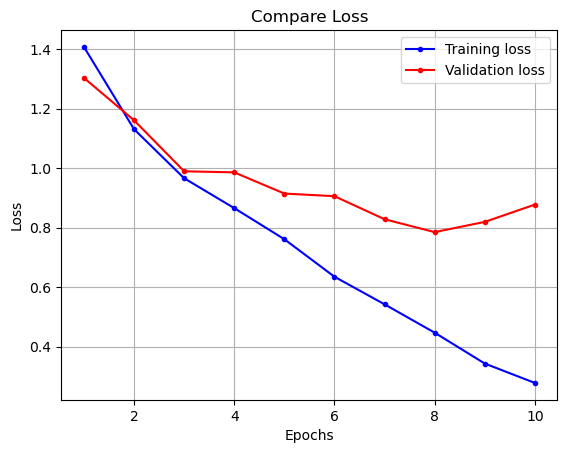

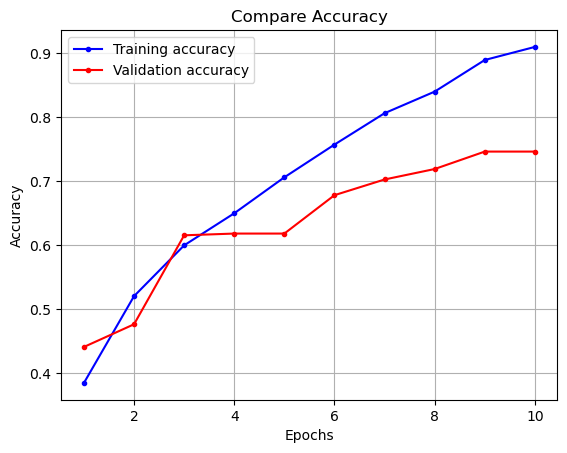

In [23]:
def plot_metrics(history):
    # Loss for the train and validation set
    los, val_los = history.history['loss'], history.history['val_loss']
    plt.plot(np.arange(len(los)) + 1, los, "b.-", label="Training loss")
    plt.plot(np.arange(len(val_los)) + 1, val_los, "r.-", label="Validation loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Compare Loss")
    plt.legend()
    plt.grid(True)
    plt.show()
    # Accuracy for the train and validation set
    acc, val_acc = history.history['accuracy'], history.history['val_accuracy']
    plt.plot(np.arange(len(acc)) + 1, acc, "b.-", label="Training accuracy")
    plt.plot(np.arange(len(val_acc)) + 1, val_acc, "r.-", label="Validation accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.title("Compare Accuracy")
    plt.legend()
    plt.grid(True)
    plt.show()
    
plot_metrics(history_basic)

_Comment on the performance of the model based the tracked loss and metric_

The model performs better in the training set as the number of Epochs increases, where the loss decreases and the accuracy increases all the time. However, the performance of the model in the validation set is similar at the beginning, and when Epochs = 8, its loss increases and accuracy converges somewhere, which means this model performs worse when Epochs is large.

*What happens if we were to train the model for more epochs? What will happen to the performance of the model?*

If we train the model for more epochs, the monotonicity of the loss and accuracy for the training set will keep the same but the loss of the validation set would increase and the performance of the model would be worse. 

*Write a function `model_predict` that takes the model and some image data and returns the predicted targets (as integers corresponding to the predicted labels).* 

In [24]:
def model_predict(model, x):
    predictions = model.predict(x)
    # Convet one-hot vector to integer
    predicted_targets = np.argmax(predictions, axis=1)
    return predicted_targets

_Gather the targets of the test set (scalar integer value corresponding to the labels) and save them in `test_targets`._

_Compute the targets for `model_basic` and store them in the variable `test_targets_basic`._

In [25]:
test_targets = np.argmax(y_test, axis=1)
test_targets_basic = model_predict(model_basic, x_test)

12/12 [==============================] - 1s 34ms/step


In [26]:
check_var_defined('test_targets')
check_var_defined('test_targets_basic')

assert test_targets.ndim == 1, "Make sure you are only predicting the scalar label value not the one hot vectors"
assert test_targets_basic.ndim == 1, "Make sure you are only predicting the scalar label value not the one hot vectors"

test_targets defined.
test_targets_basic defined.


_Calculate the precision and recall averaged over the 5 classes. (Precision and recall for each classes and then avaraged in one score)_

In [27]:
def average_recall_precision(y, y_predict):
    precision, recall = np.zeros(5), np.zeros(5)
    for i in range(5):
        tp = np.sum((y == y_predict) & (y_predict == i))
        fn, fp = np.sum((y == i) & (y_predict != i)), np.sum((y != i) & (y_predict == i))
        recall[i] = tp / (tp + fn)
        precision[i] = tp / (tp + fp)
    recall = np.sum(recall) / 5
    precision = np.sum(precision) / 5
    print(f"Average Recall: {recall:.3f}, Average Precision {precision:0.3f}")
    return recall, precision

recall_basic, precision_basic = average_recall_precision(test_targets, test_targets_basic)

Average Recall: 0.757, Average Precision 0.762


In [28]:
check_var_defined('recall_basic')
check_var_defined('precision_basic')

recall_basic defined.
precision_basic defined.


_Show the predicted targets in a confusion matrix. Show the predicted labels in percentages (percentage of the samples from true class labeled as predicted class) and add the labels to the axes._

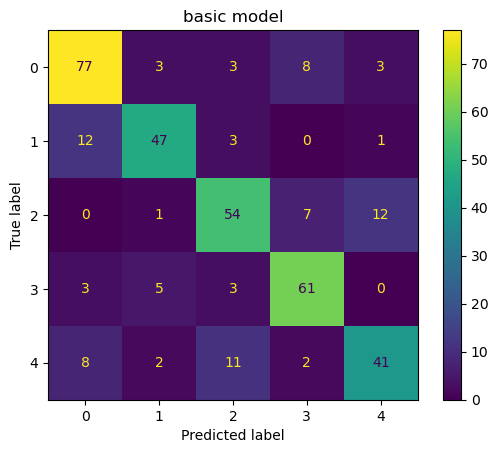

In [29]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def plot_confusion_matrix(y, y_pred, title=""):
    cf_mat = confusion_matrix(y, y_pred)
    cf_mat_d = ConfusionMatrixDisplay(cf_mat, display_labels=[0,1,2,3,4])
    cf_mat_d.plot(values_format="d")
    plt.title(title)
    plt.show()

plot_confusion_matrix(test_targets, test_targets_basic, "basic model")

_Comment on the recall and precision of the model, as well as the predictions in the confusion matrix._

Both the average recall and precision are around 0.76 which means this model performs well but still can be improved. And from the confusion matrix, we find class 0 has the highest recall and precision which means it has the best predictions whereas class 4 has the worst.

# Part 3: Improving the model

To improve on the model we will include some Dropout layers. 

_What do dropout layers do and why might this increase the performance of our models?_

Dropout layers ignore a portion of the input units at each epoch, which increases the performance of our models because it can be used to avoid overfitting in our models.

Another method to improve the model is by using a technique called data augmentation. 

_Explain the concept data augmentation and explain how it might increase the performance of our model._

Data augmentation extends the original dataset by generating new training dataset from the existing one, which can be helpful to prevent overfitting in our models.

_Use the exact same model as for the `model_basic`, but play around with adding in a data augmentation layer (e.g. [tf.keras.layers.RandomFlip](https://www.tensorflow.org/api_docs/python/tf/keras/layers/RandomFlip) ) and adding in dropout layers (dropout is typically only added in the dense part of the network). Store the new model in the variable `model_dropout` and compile it using the same metrics and loss as before._

In [30]:
tf.keras.backend.clear_session()
tf.keras.utils.set_random_seed(48263)

model_dropout = tf.keras.models.Sequential([
    # Data augmentation
    tf.keras.layers.RandomFlip("horizontal"),
    # Input layer
    tf.keras.layers.Conv2D(filters=8, kernel_size=(3,3), activation="relu", input_shape=(224, 224, 3)),
    # Maxpool and convolutional layers
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    # Flatten and dense layer
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=32, activation='relu'),
    # Dropout layer
    tf.keras.layers.Dropout(0.5),
    # Output layer
    tf.keras.layers.Dense(units=5, activation='softmax')
])

model_dropout.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [31]:
check_var_defined('model_dropout')

model_dropout defined.


_Fit the new model in the same way as before and save the history in `history_dropout`. However, train for 20 epochs instead of 10._

In [32]:
tf.keras.utils.set_random_seed(103745)
history_dropout = model_dropout.fit(x_train, y_train, epochs=20, batch_size=32, validation_data=(x_val, y_val))

Epoch 1/20
92/92 [==============================] - 17s 171ms/step - loss: 1.5326 - accuracy: 0.2902 - val_loss: 1.4344 - val_accuracy: 0.3869
Epoch 2/20
92/92 [==============================] - 16s 170ms/step - loss: 1.4330 - accuracy: 0.3501 - val_loss: 1.3808 - val_accuracy: 0.4169
Epoch 3/20
92/92 [==============================] - 16s 170ms/step - loss: 1.3629 - accuracy: 0.3770 - val_loss: 1.3250 - val_accuracy: 0.4605
Epoch 4/20
92/92 [==============================] - 16s 170ms/step - loss: 1.2362 - accuracy: 0.4496 - val_loss: 1.2184 - val_accuracy: 0.5204
Epoch 5/20
92/92 [==============================] - 16s 171ms/step - loss: 1.1160 - accuracy: 0.5473 - val_loss: 1.0526 - val_accuracy: 0.5804
Epoch 6/20
92/92 [==============================] - 16s 171ms/step - loss: 1.0526 - accuracy: 0.5729 - val_loss: 1.0426 - val_accuracy: 0.6540
Epoch 7/20
92/92 [==============================] - 16s 173ms/step - loss: 0.9842 - accuracy: 0.6093 - val_loss: 0.9770 - val_accuracy: 0.6594

In [33]:
check_var_defined('history_dropout')

history_dropout defined.


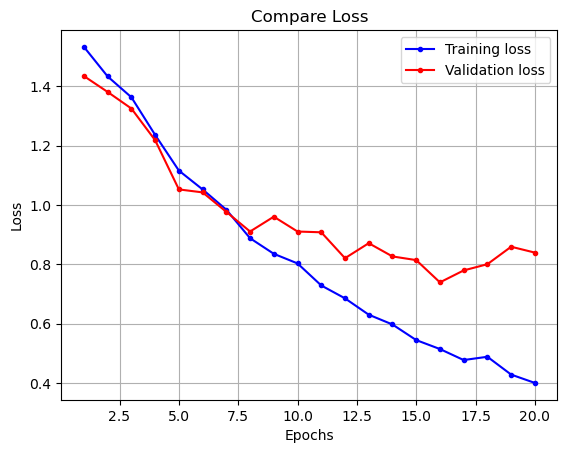

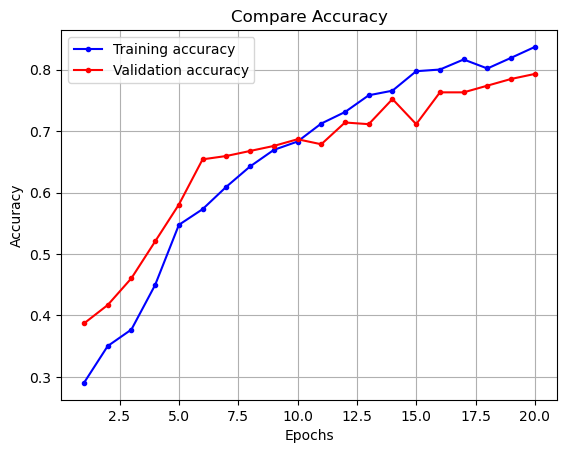

In [34]:
plot_metrics(history_dropout)

_Comment on the performance of the improved model based on the loss and metrics during training._

The model performs better in the training set as the number of Epochs increases, where the loss decreases and the accuracy increases all the time. However, the accuracy of the validation set is similar but its loss converges after Epochs reach 8, which means this model performs better but stills need improvement.

_Why did we have to train the model for longer than the basic model?_

Because we add a data augmentation layer which increases the size of the datasets and a dropout layer to our model and the training epochs.

Now we evaluate our model on the test set using the functions you wrote before

12/12 [==============================] - 0s 34ms/step
Average Recall: 0.774, Average Precision 0.782


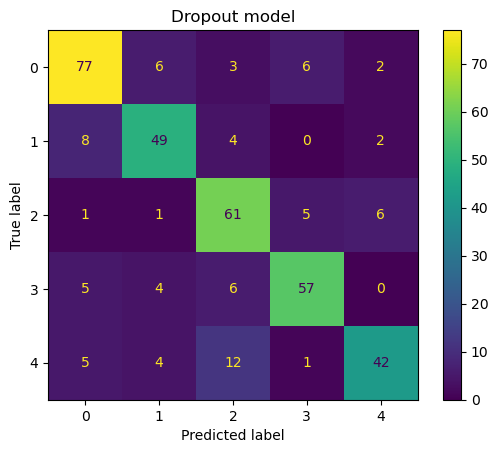

In [35]:
test_targets_dropout = model_predict(model_dropout, x_test)
recall_dropout, precision_dropout = average_recall_precision(test_targets, test_targets_dropout)    
plot_confusion_matrix(test_targets, test_targets_dropout, "Dropout model")

In [36]:
check_var_defined('test_targets_dropout')
check_var_defined('recall_dropout')

test_targets_dropout defined.
recall_dropout defined.


In [37]:
check_var_defined('test_targets_dropout')
check_var_defined('precision_dropout')

test_targets_dropout defined.
precision_dropout defined.


_Comment on the precision and recall of the model as well as the predictions in the confusion matrix_

Both the average recall and precision are around 0.78 which means this model performs better than the basic model but still can be improved. And from the confusion matrix, we find class 0 still has the highest recall and precision which means it has the best predictions whereas class 4 still has the worst.

# Part 4: Transfer learning

In order to improve our model even further, we will make use of transfer learning. 

_Explain in your own words what tranfer learning means and why it would help in our particular case._

Tranfer learning means we can use pre-trained models to extract useful features to help solve a new task. And since the size of our dataset is small and our task to classify them is very common which means it may have been solved by other existing models. 

Below you can see how we load in a pre-trained MobileNet that is trained on the ImageNet datastet. By not including the top part of the network we get only the convolutional layers and can add our own dense layers after that. We set all the layers of the MobileNet as not trainable, since this would be computationally expensive to do and we also want to avoid overfitting. Instead we will only be training the dense part. 

In [38]:
mobilenet = tf.keras.applications.mobilenet.MobileNet(
    input_shape=(224, 224, 3),
    include_top=False, 
    weights='imagenet'
)

for layer in mobilenet.layers:
   layer.trainable = False

print("Output shape of the MobileNet: ", mobilenet.output_shape)

Output shape of the MobileNet:  (None, 7, 7, 1024)


_Use a sequential model and add the MobileNet, followed by a MaxPool2D layer, and then the dense part of the network which you can use the same as we have used in the previous models. Store the model in the variable `model_mobilenet`. Compile the model using the same metrics, loss and optimiser as before._

In [39]:
tf.keras.backend.clear_session()
tf.keras.utils.set_random_seed(387453)

model_mobilenet = tf.keras.models.Sequential([
    # Add the MobileNet
    mobilenet,
    # Maxpool layers
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    # Flatten and dense layer
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=32, activation='relu'),
    # Dropout layer
    tf.keras.layers.Dropout(0.5),
    # Output layer
    tf.keras.layers.Dense(units=5, activation='softmax')
])

model_mobilenet.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [40]:
check_var_defined('model_mobilenet')

model_mobilenet defined.


*Train the model in the same way as before, for 10 epochs.*

In [41]:
tf.keras.utils.set_random_seed(9673)
history_mobilenet = model_mobilenet.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_val, y_val))

Epoch 1/10
92/92 [==============================] - 27s 278ms/step - loss: 1.3468 - accuracy: 0.4465 - val_loss: 0.8617 - val_accuracy: 0.6975
Epoch 2/10
92/92 [==============================] - 25s 272ms/step - loss: 1.1705 - accuracy: 0.5078 - val_loss: 0.8064 - val_accuracy: 0.7330
Epoch 3/10
92/92 [==============================] - 25s 271ms/step - loss: 1.0666 - accuracy: 0.5395 - val_loss: 0.6817 - val_accuracy: 0.8038
Epoch 4/10
92/92 [==============================] - 25s 271ms/step - loss: 0.9938 - accuracy: 0.5800 - val_loss: 0.5821 - val_accuracy: 0.8556
Epoch 5/10
92/92 [==============================] - 25s 272ms/step - loss: 0.9246 - accuracy: 0.6093 - val_loss: 0.6841 - val_accuracy: 0.8120
Epoch 6/10
92/92 [==============================] - 25s 272ms/step - loss: 0.8749 - accuracy: 0.6151 - val_loss: 0.4556 - val_accuracy: 0.8556
Epoch 7/10
92/92 [==============================] - 25s 272ms/step - loss: 0.8070 - accuracy: 0.6247 - val_loss: 0.4058 - val_accuracy: 0.8747

In [42]:
check_var_defined('history_mobilenet')

history_mobilenet defined.


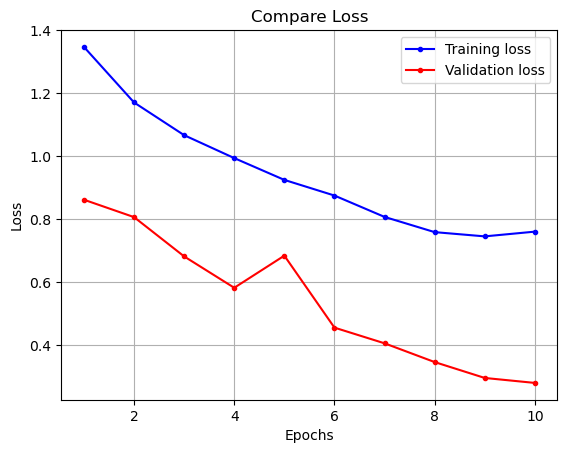

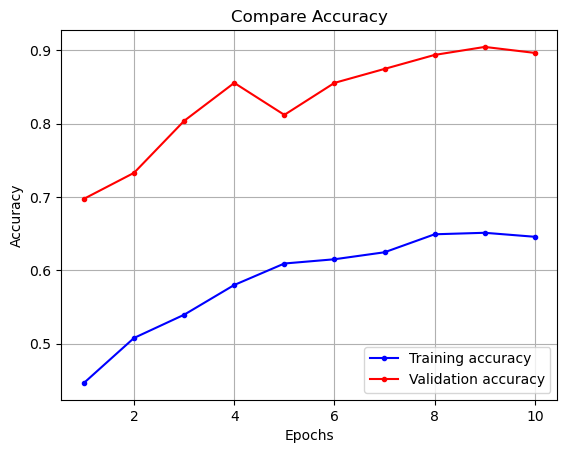

In [43]:
plot_metrics(history_mobilenet)

12/12 [==============================] - 3s 228ms/step
Average Recall: 0.942, Average Precision 0.937


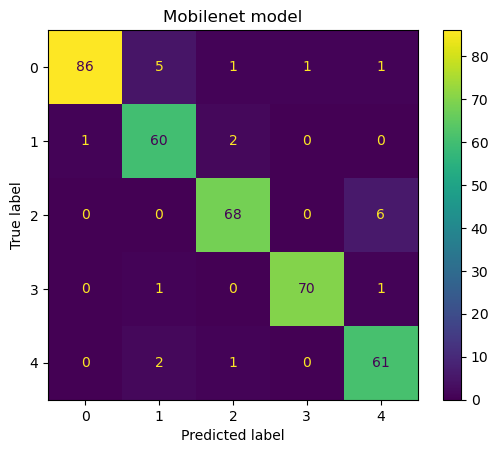

In [44]:
test_targets_mobilenet = model_predict(model_mobilenet, x_test)
recall_mobilenet, precision_mobilenet = average_recall_precision(test_targets, test_targets_mobilenet)    
plot_confusion_matrix(test_targets, test_targets_mobilenet, "Mobilenet model")

In [45]:
check_var_defined('test_targets_mobilenet')
check_var_defined('recall_mobilenet')


test_targets_mobilenet defined.
recall_mobilenet defined.


In [46]:
check_var_defined('precision_mobilenet')


precision_mobilenet defined.


_Comment on the results from the transfer-learned model and why the results differ to the case considered previously without transfer learning._

For the transfer-learned model, we find it has better performance than all the models before, and for the differences, we find the validation set always has lower loss and higher accuracy than the training set which means it has better performance than the training set, and this model is not overfitting. The reason is that the mobilenet model we used for transfer-learned performs well enough, it will perform worse if we keep training it, so it would perform worse in the training set, but perform well on the unused dataset (validation set).

_Suggest some ways the model could be improved further._

We can set different hyperparameters such as learning rate to find the better model.
We can also collect more data to expand our dataset which could be helpful to increase the performance of the model.